In [72]:
from keras import layers,models,optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from keras.preprocessing import image
import os
sns.set()


In [3]:
## next copy 1000 of each class for training and 500 
#for validation and its enough 
#bash cmd used _: bash -c 'for ((c=0;c<1000;c++))do 
#cp train/cat.${c}.jpg train_cats_dir/cat.${c}.jpg;done;'


In [5]:
model =models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))



In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])


In [11]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_dir=('/home/ubuntu/hamza/manning/data/train')
test_dir=('/home/ubuntu/hamza/manning/data/test')
validation_dir=('/home/ubuntu/hamza/manning/data/validation')

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 52s 520ms/step - loss: 0.6901 - acc: 0.5470 - val_loss: 0.6687 - val_acc: 0.6060
Epoch 2/30
100/100 [==============================] - 49s 493ms/step - loss: 0.6603 - acc: 0.5950 - val_loss: 0.6438 - val_acc: 0.6420
Epoch 3/30
100/100 [==============================] - 49s 493ms/step - loss: 0.6196 - acc: 0.6605 - val_loss: 0.6164 - val_acc: 0.6640
Epoch 4/30
100/100 [==============================] - 49s 495ms/step - loss: 0.5839 - acc: 0.6960 - val_loss: 0.5969 - val_acc: 0.6850
Epoch 5/30
100/100 [==============================] - 51s 508ms/step - loss: 0.5445 - acc: 0.7060 - val_loss: 0.6087 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 49s 491ms/step - loss: 0.5111 - acc: 0.7480 - val_loss: 0.5814 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 49s 491ms/step - loss: 0.4867 - acc: 0.7600 - val_loss: 0.5932 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 4

In [17]:
model.save('cats_and_dogs_small_1.h5')

## plot validation vs train acc and loss 

In [33]:
acc =history.history['acc']
val_acc =history.history['val_acc']
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs=range(1,len(acc)+1)
''' -ignoring seaborn because i dont want to restart the kernel and update the version- 
    data_dict = {'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs}
    data=pd.DataFrame.from_dict(data_dict)
'''


" -ignoring seaborn because i dont want to restart the kernel and update the version- \n    data_dict = {'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs}\n    data=pd.DataFrame.from_dict(data_dict)\n"

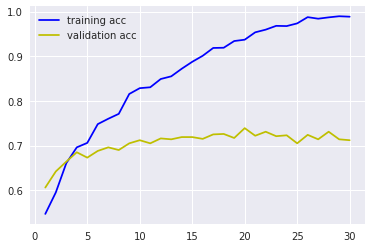

In [36]:
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'y',label='validation acc')
plt.legend()

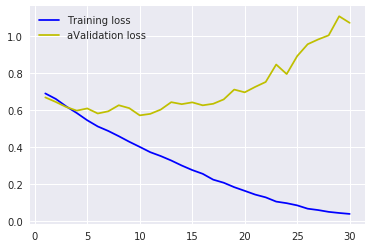

In [37]:
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'y',label='aValidation loss')
plt.legend()

In [39]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


## Testing the image generator on one image 

In [40]:
validation_dir

'/home/ubuntu/hamza/manning/data/validation'

In [60]:
img_path = '/home/ubuntu/hamza/manning/data/train/cats/cat.3.jpg'
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)


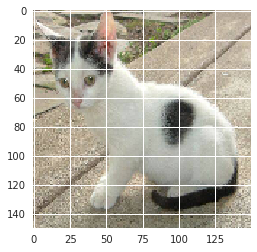

In [61]:
plt.imshow(img)

In [62]:
x.shape

(150, 150, 3)

In [64]:
x=x.reshape((1,)+x.shape) ## datagen.flow accept 4 dimentioons tensors

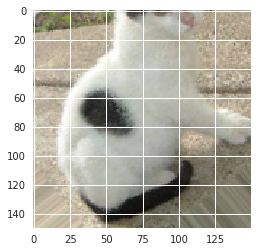

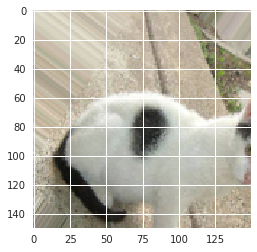

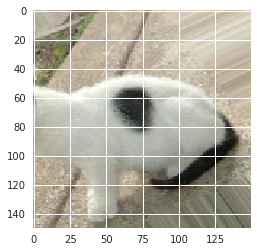

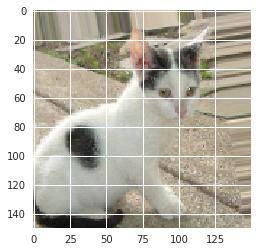

In [65]:
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    img_pathlot=plt.imshow(image.array_to_img(batch[0]))
    i=i+1
    if(i==4):
        break
plt.show()

## Data Augmentation is not enought, add a drop out layer is needed 
##### Data augmentation on the same data is not realy adding new data to the network but jus a remix of it 

In [67]:
model =models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) ## drop out here 
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))



In [68]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,
                            validation_generator=validation_generator,validation_steps=50)

In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
## plot the acc 
acc =history.history['acc']
val_acc =history.history['val_acc']
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs=range(1,len(acc)+1)


In [ ]:
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'y',label='aValidation loss')
plt.legend()

In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

## Trying a pretraind network


In [70]:
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58892288/58889256 [==============================] - 5s 0us/step


In [71]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### 1.Without data augmentation

In [73]:
base_dir = '/home/ubuntu/hamza/manning/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test') 
datagen=ImageDataGenerator(rescale=1./255)
batch_size=20


In [79]:
 def extract_features(directory,sample_count):
        features=np.zeros(shape=(sample_count,4,4,512))
        labels=np.zeros(shape=sample_count)
        generator=datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary')
        i=0
        for input_batch,label_batch in generator:
            features_batch=conv_base.predict(input_batch)
            features[i*batch_size:(i+1)*batch_size]=features_batch
            labels[i*batch_size:(i+1)*batch_size]=label_batch
            if i * batch_size >= sample_count:
                break
        return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

In [ ]:
##To do : plot the training/validation accuracy and losses 
## Run the second approche but GPU is needed for data augmentation !!